# Low dimensional solutions

In [10]:
from sola.main_classes.spaces import RN, Subspace
from sola.main_classes.mappings import FiniteLinearMapping
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from mayavi import mlab

In this notebook we will look at solutions to linear equations such as:
$$G(m)=d \tag{1}$$
when dealing with only finite dimensinal spaces. Just as a remainder, here is a list of names that we will use:
- G: forward mapping
- d: data
- m: model
- $\mathcal{M}$: model space
- $\mathcal{D}$: data space
- $G(m)=d$: the data constraint

In this example $\mathcal{M} = \mathbb{R}^3$ and $\mathcal{D} = \mathbb{R}^2$. So $G$ maps models from $\mathcal{M}$ to $\mathcal{D}$, which can also be spelled in mathematical notation as: 
$$
G: \mathcal{M} \rightarrow \mathcal{D}.
$$

In [11]:
# We create the needed spaces
M = RN(3)
N = RN(2)
D = RN(2)

## Null space of G

Let's create a matrix that represents the mapping $G$, and the mapping itself:

In [12]:
G_matrix = np.array([[1, 0, 2],
                     [0, 1, 0]])

# We create the mapping
G = FiniteLinearMapping(domain=M, codomain=D, matrix=G_matrix)

You may now wonder why I make a distinction between the "mapping itself" and the "matrix that represents the mapping G". A mapping is an abstract mathematical object that takes members of a domain space and outputs members of a codomain space. The mapping is defined by its domain, codomain, and a set of rules that describes how it maps between the two spaces. For linear mappings between finite dimensional linear spaces (like we have here) these rules can be neatly described in terms of the rules of matrix algebra. There are other kinds of mappings that cannot be described using matrices. "FiniteLinearMapping" is a class that encompases everything about the mapping, including its matrix representation.

The matrix has two independent rows. If not all the rows are linearly independent, it would mean that we have repeated data measurements. Now, this matrix is part of the $\mathbb{R}^{2\times3}$ space and takes in $3\times 1$ column vectors and maps them to $2 \times 1$ column vectors, which means that "one dimension is lost through the mapping". This is basically a loss of information, and it is what will make the problem of finding the model from the data impossible. More specifically, this loss of information will make the inverse problem ill posed and have infinitely many solutions. 

We can study and visualize how this loss of information happens by investigating the null space of $G$, also called the kernel of G. By definitions the null space (kernel) of $G$ is given by:
$$
\ker(G) = \{m \vert G(m)=0, m\in \mathcal{M} \}. \tag{2}
$$

So $\ker(G)$ is the set of all models that get mapped to the $0$ element of $\mathcal{D}$. Note also that $\ker(G)$ is a subset of $\mathcal{M}$ (mathematically we say $\ker(G) \subset \mathcal{M}$). Why is this subset special/important? Let's say that somehow you found out that $\tilde{m} \in \mathcal{M}$ is a solution to the data constraint:
$$
G(\tilde{m}) = d
$$
Now consider $m^0 \in \ker(G)$ to be a member of the null space of $G$. We know that $G(m^0) = 0$. However, since $G$ is linear, we can do the following:
$$
G(\tilde{m}) + G(m^0) = d + 0 \\
G(\tilde{m} + m^0) = d
$$
and we see that $\tilde{m} + m^0$ is a new solution to the data constraint. THIS is why our problem has non-unique solutions. Once you found a solution to the data constraint you can just add to it various members of the null space of $G$ and generate infinitely many other solutions. So from the perspective of a person trying to find the correct model given the data constraint, there are infinitely many solutions and there is no definite way of choosing the correct one unless more information is introduced in the problem (via regularizations for example).

In practice, we can find the null space by solving $G(m) = 0$, or even simpler, using a function in a package like scipy:

In [13]:
null_space_base = linalg.null_space(G_matrix)
print(null_space_base)

[[-0.89442719]
 [ 0.        ]
 [ 0.4472136 ]]


Note that the null space is given simply as a vector. Why? Well, the null space contains an infinite number of points, so it would take a bit of space to write all of them down. But we don't actually have to write all of them down. Since the null space is a linear vector space, it means that we can choose a vector basis for the null space, so any other member of the null space will be just a linear combination of these basis vectors. In our case the null space is one dimensional, so one vector is enough to fully charaterize the null space. 

OK, so now we know the null space, and we know that it is the cause of our problems. What happens if we remove the null space from the model space? We can in fact do this, and it will get rid of the non-uniqueness. The space that is left after removing the null space is called the row space of $G$:
$$
row(G) = \mathcal{M} - \ker(G).
$$
Why is it called the row space? Because $row(G)$ is equal to the subspace of $\mathcal{M}$ formed from all possible linear combinations of the rows of $G$. Mathematically:
$$
row(G) = \{m \vert m=sG_{1\cdot} + t G_{2\cdot}, s\in \mathbb{R}, t \in \mathbb{R}\}
$$
where $G_{i\cdot}$ is the i-th row of $G$.

Below we visualize the two spaces:

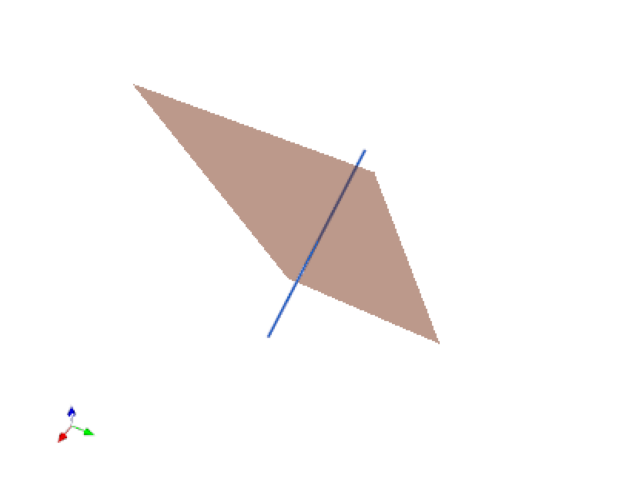

In [44]:
# Edit region ----------------------------------------------
interactive_view = False
# Edit region ----------------------------------------------

# The row space is spanned by the rows of the matrix
row_space = G_matrix

# Generate points for the null space line
t = np.linspace(-10, 10, 400)
null_space_points = null_space_base[:, 0].reshape(-1, 1) * t

# Generate a meshgrid for the row space plane
x, y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
z = -(null_space_base[0, 0] * x + null_space_base[1, 0] * y) / null_space_base[2, 0]

# Create a new figure
mlab.figure(bgcolor=(1, 1, 1))

# Plot the null space line
mlab.plot3d(null_space_points[0], null_space_points[1], null_space_points[2],
            tube_radius=None, line_width=2.0, color=tuple(np.array([35, 96, 194])/255), name='Null Space Line')

# Plot the row space plane
mlab.mesh(x, y, z, opacity=0.5, color=tuple(np.array([194, 83, 35])/255), name='Row Space Plane')

# Plot the axes for reference
mlab.orientation_axes()

# Show the plot
if interactive_view:
    mlab.show()
else:
    # Set the camera view
    mlab.view(azimuth=30, elevation=45)

    # Instead of mlab.show(), use mlab.screenshot() to capture the scene
    screenshot = mlab.screenshot(antialiased=True)

    # Close the Mayavi window to prevent it from being displayed
    mlab.close()

    # Use matplotlib to display the screenshot as a static image
    plt.figure(figsize=(10, 6))
    plt.imshow(screenshot)
    plt.axis('off')  # Hide the axes
    plt.show()

The entire space is $\mathcal{M}$, the blue line is $\ker(G)$, and with orange we have $\mathcal{M} - \ker(G)$.

We can use the sola package to create and operate on $\ker(G)$ and $row(G)$:

In [15]:
# Creating the null space as a subspace of the model space
null_G = Subspace(M, [null_space_base])

# Row space as a subspace of the model space (I have to reshape the rows to
# column vectors, because members of the model space are column vectors)
row_G = Subspace(M, [G_matrix[0,:].reshape(G_matrix.shape[1], 1), G_matrix[1,:].reshape(G_matrix.shape[1], 1)])

# Get random null space member
m0 = null_G.random_member(seed=2)
d0 = G.map(m0)
print('Random member of the null space of G: \n', m0)
print('It gets mapped to 0 in the data space: \n', d0) # This should be zero, but numerical errors may appear

# Get random row space member
m1 = row_G.random_member(seed=3)
d1 = G.map(m1)
print('Random member of the row space of G: \n', m1)
print('It gets mapped to: \n', d1)

Random member of the null space of G: 
 [[11.44957998]
 [ 0.        ]
 [-5.72478999]]
It gets mapped to 0 in the data space: 
 [[-5.32907052e-15]
 [ 0.00000000e+00]]
Random member of the row space of G: 
 [[10.15958051]
 [41.62956452]
 [20.31916103]]
It gets mapped to: 
 [[50.79790257]
 [41.62956452]]


Now let's also plot these vectors. With red we have the member of the null space of G, and with green the member of $\mathcal{M} - \ker(G)$. In both cases we have normalized the vectors because their direction is what really matters in this case.

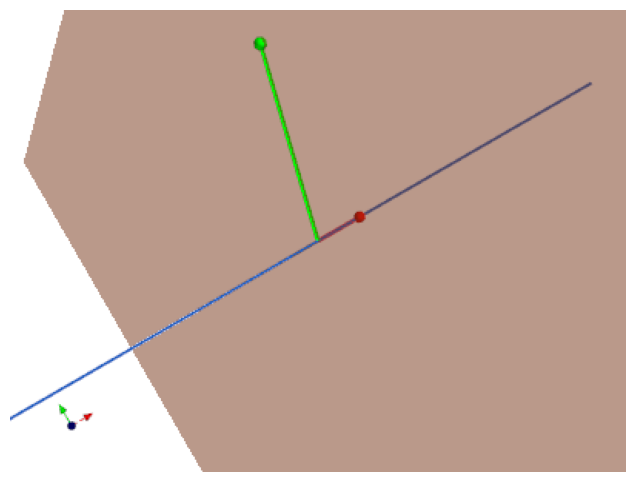

In [41]:
# Edit region ----------------------------------------------
interactive_view = False
# Edit region ----------------------------------------------

%matplotlib inline
# The row space is spanned by the rows of the matrix
row_space = G_matrix

# Generate points for the null space line
t = np.linspace(-100, 100, 400)
null_space_points = null_space_base[:, 0].reshape(-1, 1) * t

# Generate a meshgrid for the row space plane
x, y = np.meshgrid(np.linspace(-100, 100, 100), np.linspace(-100, 100, 100))
z = -(null_space_base[0, 0] * x + null_space_base[1, 0] * y) / null_space_base[2, 0]

# Create a new figure
mlab.figure(bgcolor=(1, 1, 1))

# Plot the null space line
mlab.plot3d(null_space_points[0], null_space_points[1], null_space_points[2],
            tube_radius=None, line_width=2.0, color=tuple(np.array([35, 96, 194])/255), name='Null Space Line')

# Plot the row space plane
mlab.mesh(x, y, z, opacity=0.5, color=tuple(np.array([194, 83, 35])/255), name='Row Space Plane')

# Plot the axes for reference
mlab.orientation_axes()

# Plot the vectors as lines instead of arrows and add spheres at the end
mlab.plot3d([0, m0[0,0]], [0, m0[1,0]], [0, m0[2,0]], tube_radius=None, line_width=3.0, color=(1, 0, 0))
mlab.plot3d([0, m1[0,0]], [0, m1[1,0]], [0, m1[2,0]], tube_radius=None, line_width=3.0, color=(0, 1, 0))

# Add spheres at the end of the lines to represent the vector tips
mlab.points3d(m0[0], m0[1], m0[2], scale_factor=3, color=(1, 0, 0))
mlab.points3d(m1[0], m1[1], m1[2], scale_factor=3, color=(0, 1, 0))

# Show the plot
if interactive_view:
    mlab.show()
else:
    # Set the camera view with zoom
    distance = 200  # Adjust this value to zoom in or out
    mlab.view(azimuth=30, elevation=0, distance=distance)

    # Instead of mlab.show(), use mlab.screenshot() to capture the scene
    screenshot = mlab.screenshot(antialiased=True)

    # Close the Mayavi window to prevent it from being displayed
    mlab.close()

    # Use matplotlib to display the screenshot as a static image
    plt.figure(figsize=(10, 6))
    plt.imshow(screenshot)
    plt.axis('off')  # Hide the axes
    plt.show()

And we can also plot the vectors mapped through G into the data space. The vector d0 is just the zero point.

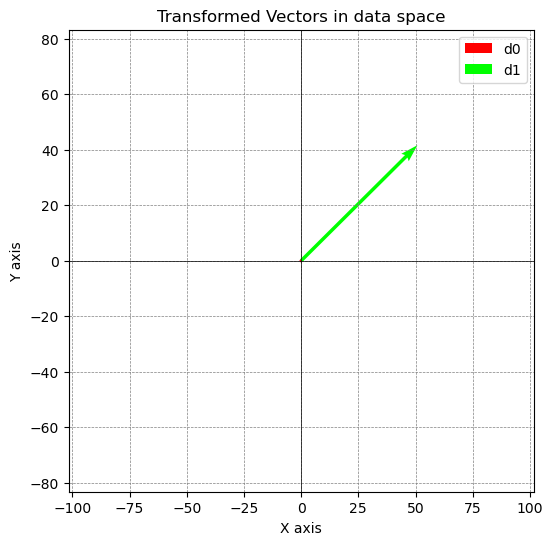

In [17]:
# Create a new figure for the 2D plot
plt.figure(figsize=(6, 6))

# Plot the transformed vectors using quiver
# Note: quiver uses scale to adjust the arrow size, making head_width and head_length unnecessary
plt.quiver(0, 0, d0[0, 0], d0[1, 0], angles='xy', scale_units='xy', scale=1, color=(1,0,0), label='d0')
plt.quiver(0, 0, d1[0, 0], d1[1, 0], angles='xy', scale_units='xy', scale=1, color=(0,1,0), label='d1')

# Customize the plot
plt.xlim(-2*d1[0, 0], 2*d1[0, 0])
plt.ylim(-2*d1[1, 0], 2*d1[1, 0])
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title('Transformed Vectors in data space')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()

# Show the plot
plt.show()

In the next figure we visualize a set of vectors formed from a row space member plus several null space members. All of the resulting vectors lie on a line parallel to the null space line, and all of them will be mapped to the same vector in the data space. 

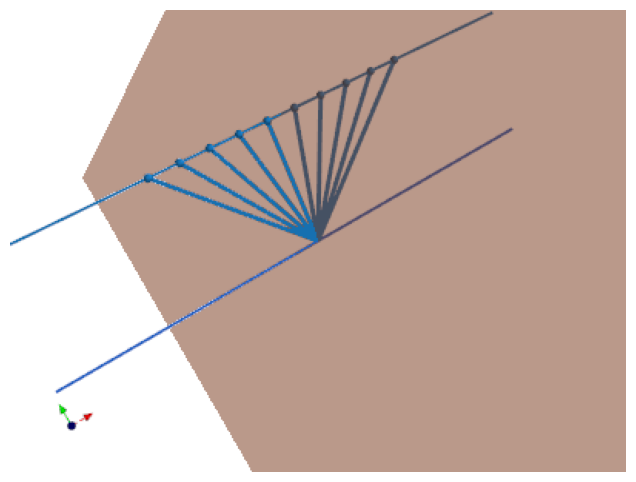

In [40]:
# Edit region ----------------------------------------------
interactive_view = False
# Edit region ----------------------------------------------
list_of_ms = [m1 + c * null_space_base for c in np.linspace(-50, 50, 10)]

# Edit region ----------------------------------------------
interactive_view = False
# Edit region ----------------------------------------------

%matplotlib inline
# The row space is spanned by the rows of the matrix
row_space = G_matrix

# Generate points for the null space line
t = np.linspace(-100, 100, 400)
null_space_points = null_space_base[:, 0].reshape(-1, 1) * t
shifted_null_space_points = m1[:,0].reshape(-1, 1) + null_space_base[:, 0].reshape(-1, 1) * t

# Generate a meshgrid for the row space plane
x, y = np.meshgrid(np.linspace(-100, 100, 100), np.linspace(-100, 100, 100))
z = -(null_space_base[0, 0] * x + null_space_base[1, 0] * y) / null_space_base[2, 0]

# Create a new figure
mlab.figure(bgcolor=(1, 1, 1))

# Plot the null space line
mlab.plot3d(null_space_points[0], null_space_points[1], null_space_points[2],
            tube_radius=None, line_width=2.0, color=tuple(np.array([35, 96, 194])/255), name='Null Space Line')

# Plot model + null space members
mlab.plot3d(shifted_null_space_points[0], shifted_null_space_points[1], shifted_null_space_points[2],
            tube_radius=None, line_width=2.0, color=tuple(np.array([23, 112, 176])/255), name='Null Space Line')

# Plot the row space plane
mlab.mesh(x, y, z, opacity=0.5, color=tuple(np.array([194, 83, 35])/255), name='Row Space Plane')

# Plot the axes for reference
mlab.orientation_axes()

# Plot the vectors as lines instead of arrows and add spheres at the end
for model in list_of_ms:
    mlab.plot3d([0, model[0,0]], [0, model[1,0]], [0, model[2,0]], tube_radius=None, line_width=3.0, color=tuple(np.array([23, 112, 176])/255))
    mlab.points3d(model[0], model[1], model[2], scale_factor=3, color=tuple(np.array([23, 112, 176])/255))

# Show the plot
if interactive_view:
    mlab.show()
else:
    # Set the camera view with zoom
    distance = 300  # Adjust this value to zoom in or out
    mlab.view(azimuth=30, elevation=0, distance=distance)

    # Instead of mlab.show(), use mlab.screenshot() to capture the scene
    screenshot = mlab.screenshot(antialiased=True)

    # Close the Mayavi window to prevent it from being displayed
    mlab.close()

    # Use matplotlib to display the screenshot as a static image
    plt.figure(figsize=(10, 6))
    plt.imshow(screenshot)
    plt.axis('off')  # Hide the axes
    plt.show()

## Adjoint of G and a particular solution

The adjoint of $G$ is defined as follows:
$$
G^{\dagger}:\mathcal{D}\rightarrow \mathcal{M} \\
\left< G(m), d \right>_{\mathcal{D}} = \left< m, G^{\dagger}(d) \right>_{\mathcal{M}} \forall m \in \mathcal{M}, d \in \mathcal{D}
$$
You may understand the adjoint as follows:
- Pick a model $m$ and a data $d$
- Map m through $G$ to obtain $G(m)$
- Take the inner product between $G(m)$ and $d$ in the data space. Let's say the valus is x
- Go back to the model space, and find which model will have inner product with m equal to x.
- Assume that the model found is actually the mapping of d into the model space by some unknown mapping.
- If we can pick any other combination of m and d and go through the same steps again, then the unkown mapping is $G^{\dagger}$

For us, we can easily show that the matrix representation of $G^{\dagger}$ is simply the transpose of the matrix representation of $G$:
$$
\left< G(m), d \right>_{\mathcal{D}} = \left< m, G^{\dagger}(d) \right>_{\mathcal{M}} \\
(Gm)^T d = m^T G^{\dagger}d \\
m^T G^T d = m^T G^{\dagger}d \\
G^T = G^{\dagger}
$$

$G^{\dagger}$ can map members of the data space ONLY IN THE ROW SPACE OF G! In other words, no matter what $d \in {\mathcal{D}}$ you choose, $G^{\dagger}(d)$ will never be in $\ker(G)$. You can see this easily since matrix multiplication with a column vector is the same as taking the first column of the matrix, multiplying it by the first entry of the column vector, then multiplying the second column of the matrix with the second entry of the column vector, etc ... and in the end summing everything up. In other words, a matrix multiplication with a column vector can be seen as a linear combination of the matrix columns weighted by the vector elements. Since the columns of $G^{\dagger}$ are the same as the rows of $G$, it means that $G^{\dagger}(d)$ can only produce linear combinations of the rows of G. 

So why is $G^{\dagger}$ important? Remember that once we found a solution to $G(m)=d$ we can form new solutions by adding members of the null space to it. The null space is described by the equation $G(m)=0$. We can draw a nice parallel to differential equations here. You know that when faced with some differential equations such as $\frac{d^2f}{dx^2} = g(x)$ we first solve the homogeneous equation $\frac{d^2f}{dx^2} = 0$ which gives us a family of solutions (usually containing infinitely many solutions) and then we just have to find one particular solution to the original equation. The total solution will be the sum of the particular solution and the homogenous solutions. Mathematically we are dealing with the same problem. The general solutions to $G(m)=d$ is given by some particular solution plus any member of the null space. The question is, how can we find a particular solution? This is where the adjoint comes into play. 

So you want to find some (any!) solution to
$$
G(m) = d
$$
Note that any model can be written as the sum of a member of the row space $\tilde{m}$ and a member of the null space $m^0$, so:
$$
G(m) = G(\tilde{m} + m^0) = G(\tilde{m}) = d + 0 = d \\
G(\tilde{m}) = d
$$
But as we know, $G^{\dagger}$ maps data points into the row space of $G$, so there must be some $d'$ such that $G^{\dagger}(d')=\tilde{m}$. Therefore we can write:
$$
G(\tilde{m}) = GG^{\dagger} (d') = d
$$
As we can see $d'$ does not have to equal $d$. In fact, $d'=d$ only if $GG^{\dagger}=I$ (the identity matrix). We will denote $GG^{\dagger} = \Lambda$. It can be shown that $GG^{\dagger}$ is a symmetric and invertible matrix (for all our practical purposes), meaning that we can write:
$$
d' = \Lambda^{-1}d.
$$
But now remember that $\tilde{m} = G^{\dagger}(d')$. So if we apply $G^{\dagger}$ on the equation above, we will get:
$$
G^{\dagger}(d') = G^{\dagger} (GG^{\dagger})^{-1} d = G^{\dagger} \Lambda^{-1}d \\
\tilde{m} = G^{\dagger} \Lambda^{-1}d
$$

So, with the above equation we can obtain a solution to the data constraint that has no null space component to it. It is easy to show that $\tilde{m}$ is also the solution with the smallest norm since a general solution is given by $\tilde{m} + c m^0$ for some $c\in \mathbb{R}$ and $\lvert \tilde{m} + c m^0 \rvert^2_2$ is minimized when $c=0$. From now on we will call $\tilde{m}$ the least norm solution.

In [76]:
# Create a true model and data
m_true = np.array([[1],
                   [2],
                   [5]])
d_true = G.map(m_true)
print('True data: \n', d_true)
# Find Lambda and d prime
Lambda = G*G.adjoint
d_prime = Lambda.invert().map(d_true)
print('d\': \n', d_prime)
# Obtain least norm solution
m_tilde = G.adjoint.map(d_prime)
print('m_tilde: \n', m_tilde)
print('Check that m tilde is a solution \n', G.map(m_tilde))

True data: 
 [[11]
 [ 2]]
d': 
 [[2.2]
 [2. ]]
m_tilde: 
 [[2.2]
 [2. ]
 [4.4]]
Check that m tilde is a solution 
 [[11.]
 [ 2.]]


## Introducing model properties

$G$ maps models to data. We can create a new mapping $\mathcal{T}$ that maps models to some property of that model (and yes, one could also think of the data as being a property of the model, but for us it is more useful to separate them). Why would we introduce properties of the models? When dealing with finite dimensional model spaces we don't really need to focus on properties since we can rather easily analyze the solution space. But when we deal with infinite dimensional spaces (such as functions spaces) this task becomes practically impossible. Properties can always be represented in finite dimensional spaces, so they can be easily visualized and understood. In this example we don't deal with function spaces because I want to keep the mathematics easy, but the arguments and results shown here are identical or very similar in the infinite dimensional case. 

Let's say that we want to obtain two properties of a general model $m = (x,y,z)$: 
- The average of x and y: $0.5x + 0.5y$
- And the value of z: $z$
These properies can be written mathematically as:
$$
p = 
\begin{bmatrix}
0.5 & 0.5 & 0 \\
0 & 0 & 1 \\
\end{bmatrix} 
\begin{bmatrix}
x \\ y \\ z \\
\end{bmatrix}
\\
p = \mathcal{T}(m)
$$

Now, altough we are looking for two different properties, we will call $p$ simply "a property" and the individual values of the $p$ vector will be the property values. Ideally we would want to find the true property of the true model. Let's denote the true model $\bar{m}$ and the true property $\bar{p}$. Then we would have 
$$
\bar{p} = \mathcal{T}(\bar{m})
$$
Obviously, given only the data constraint we do not know what the true model is. We know what the least norm solution is, but there is no reason to believe that the true model should be the one with minimal norm! We can also compute the property of many other solutions by simply computing $\mathcal{T}(\tilde{m} + m^0)$ where $m^0$ are various members of $\ker(G)$. Actually, we will do just that! In the next figure we will show 12 models (blue), including the least norm model solution (green), and the true model (red).

In [79]:
# Create property space
P = RN(2)
# Create the property mapping
T_matrix = np.array([[0.5, 0.5, 0],
                     [0, 0, 1]])
T = FiniteLinearMapping(domain=M, codomain=P, matrix=T_matrix)

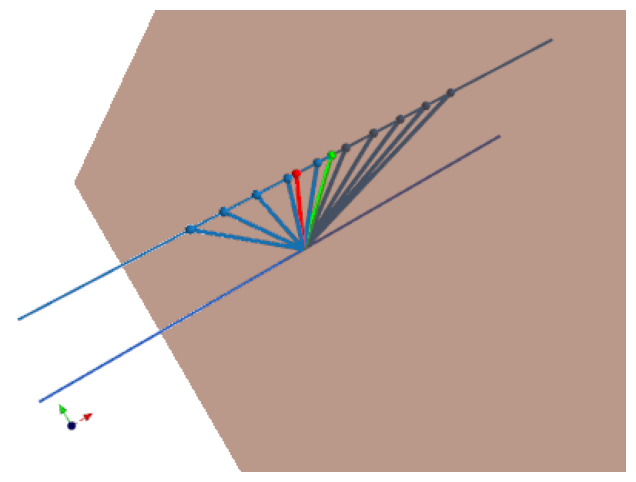

In [77]:
# Edit region ----------------------------------------------
interactive_view = False
# Edit region ----------------------------------------------

# Let's build a list of models that fit the data
list_of_models = [m_tilde + c * null_space_base for c in np.linspace(-5, 5, 10)]

%matplotlib inline
# The row space is spanned by the rows of the matrix
row_space = G_matrix

# Generate points for the null space line
t = np.linspace(-10, 10, 400)
null_space_points = null_space_base[:, 0].reshape(-1, 1) * t
shifted_null_space_points = m_tilde[:,0].reshape(-1, 1) + null_space_base[:, 0].reshape(-1, 1) * t

# Generate a meshgrid for the row space plane
x, y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
z = -(null_space_base[0, 0] * x + null_space_base[1, 0] * y) / null_space_base[2, 0]

# Create a new figure
mlab.figure(bgcolor=(1, 1, 1))

# Plot the null space line
mlab.plot3d(null_space_points[0], null_space_points[1], null_space_points[2],
            tube_radius=None, line_width=2.0, color=tuple(np.array([35, 96, 194])/255), name='Null Space Line')

# Plot model + null space members
mlab.plot3d(shifted_null_space_points[0], shifted_null_space_points[1], shifted_null_space_points[2],
            tube_radius=None, line_width=2.0, color=tuple(np.array([23, 112, 176])/255), name='Null Space Line')

# Plot the row space plane
mlab.mesh(x, y, z, opacity=0.5, color=tuple(np.array([194, 83, 35])/255), name='Row Space Plane')

# Plot the axes for reference
mlab.orientation_axes()

# Plot the 10 possible models
for model in list_of_models:
    mlab.plot3d([0, model[0,0]], [0, model[1,0]], [0, model[2,0]], tube_radius=None, line_width=3.0, color=tuple(np.array([23, 112, 176])/255))
    mlab.points3d(model[0], model[1], model[2], scale_factor=0.3, color=tuple(np.array([23, 112, 176])/255))

# Plot the true model
mlab.plot3d([0, m_true[0,0]], [0, m_true[1,0]], [0, m_true[2,0]], tube_radius=None, line_width=3.0, color=(1, 0, 0))
mlab.points3d(m_true[0], m_true[1], m_true[2], scale_factor=0.3, color=(1, 0, 0))

# Plot the least norm model solution
mlab.plot3d([0, m_tilde[0,0]], [0, m_tilde[1,0]], [0, m_tilde[2,0]], tube_radius=None, line_width=3.0, color=(0, 1, 0))
mlab.points3d(m_tilde[0], m_tilde[1], m_tilde[2], scale_factor=0.3, color=(0, 1, 0))

# Show the plot
if interactive_view:
    mlab.show()
else:
    # Set the camera view with zoom
    distance = 30  # Adjust this value to zoom in or out
    mlab.view(azimuth=30, elevation=0, distance=distance)

    # Instead of mlab.show(), use mlab.screenshot() to capture the scene
    screenshot = mlab.screenshot(antialiased=True)

    # Close the Mayavi window to prevent it from being displayed
    mlab.close()

    # Use matplotlib to display the screenshot as a static image
    plt.figure(figsize=(10, 6))
    plt.imshow(screenshot)
    plt.axis('off')  # Hide the axes
    plt.show()

As you can see, the true model is very close to one of our 10 "guesses", but in real applications we have no way of knowing that. The least norm model solution is also relatively close (and importantly, it lies in the row space of $G$!). Now let's map all these vectors to the property space.

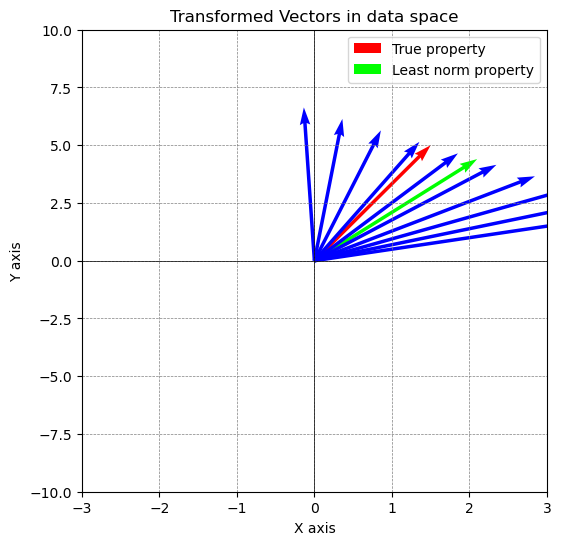

In [81]:
list_of_properties = [T.map(model) for model in list_of_models]
true_property = T.map(m_true)
least_norm_property = T.map(m_tilde)

# Create a new figure for the 2D plot
plt.figure(figsize=(6, 6))

# Plot the transformed vectors using quiver
# Note: quiver uses scale to adjust the arrow size, making head_width and head_length unnecessary
plt.quiver(0, 0, true_property[0, 0], true_property[1, 0], angles='xy', scale_units='xy', scale=1, color=(1,0,0), label='True property')
plt.quiver(0, 0, least_norm_property[0, 0], least_norm_property[1, 0], angles='xy', scale_units='xy', scale=1, color=(0,1,0), label='Least norm property')

for property in list_of_properties:
    plt.quiver(0, 0, property[0, 0], property[1, 0], angles='xy', scale_units='xy', scale=1, color=(0,0,1))

# Customize the plot
plt.xlim(-2*true_property[0, 0], 2*true_property[0, 0])
plt.ylim(-2*true_property[1, 0], 2*true_property[1, 0])
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title('Transformed Vectors in data space')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()

# Show the plot
plt.show()

If we  would plot even more properties we would see that all of them lay on an unbounded line through the property space. This is not good news, since we cannot say anything about the true property of the true model. This difficulty comes from the unboundeness of the null space of G. We can overcome this by adding another constraint on the model space. For example a norm bound:
$$
\lvert m \rvert _{\mathcal{M}} \leq M
$$

Thiss norm bound constrains the possible models to a sphere of radius $M$ in the model space. The union of the possible models and the norm bound will now be a bounded subset. 

In [91]:
# Edit region ----------------------------------------------
interactive_view = True
# Edit region ----------------------------------------------

# Let's build a list of models that fit the data
list_of_models = [m_tilde + c * null_space_base for c in np.linspace(-5, 5, 10)]

%matplotlib inline
# The row space is spanned by the rows of the matrix
row_space = G_matrix

# Generate points for the null space line
t = np.linspace(-10, 10, 400)
null_space_points = null_space_base[:, 0].reshape(-1, 1) * t
shifted_null_space_points = m_tilde[:,0].reshape(-1, 1) + null_space_base[:, 0].reshape(-1, 1) * t

# Generate a meshgrid for the row space plane
x, y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
z = -(null_space_base[0, 0] * x + null_space_base[1, 0] * y) / null_space_base[2, 0]

# Create a new figure
mlab.figure(bgcolor=(1, 1, 1))

# Plot model + null space members
mlab.plot3d(shifted_null_space_points[0], shifted_null_space_points[1], shifted_null_space_points[2],
            tube_radius=None, line_width=2.0, color=tuple(np.array([23, 112, 176])/255), name='Null Space Line')
# Calculate the distance of each point from the origin
distances_from_origin = np.sqrt(np.sum(shifted_null_space_points**2, axis=0))

# Sphere radius
sphere_radius = 8

# Determine points inside the sphere
inside_sphere = distances_from_origin <= sphere_radius

# Extract points inside and outside the sphere
points_inside_sphere = shifted_null_space_points[:, inside_sphere]
points_outside_sphere = shifted_null_space_points[:, ~inside_sphere]

# Plot the part of the shifted null space line outside the sphere (original color)
if points_outside_sphere.size > 0:
    mlab.plot3d(points_outside_sphere[0], points_outside_sphere[1], points_outside_sphere[2],
                tube_radius=None, line_width=2.0, color=tuple(np.array([23, 112, 176])/255))

# Plot the part of the shifted null space line inside the sphere (purple)
if points_inside_sphere.size > 0:
    mlab.plot3d(points_inside_sphere[0], points_inside_sphere[1], points_inside_sphere[2],
                tube_radius=None, line_width=2.0, color=(0.5, 0, 0.5))  # Purple color

# Plot the row space plane
mlab.mesh(x, y, z, opacity=0.5, color=tuple(np.array([194, 83, 35])/255), name='Row Space Plane')

# Plot the axes for reference
mlab.orientation_axes()

# Plot the 10 possible models
for model in list_of_models:
    mlab.plot3d([0, model[0,0]], [0, model[1,0]], [0, model[2,0]], tube_radius=None, line_width=3.0, color=tuple(np.array([23, 112, 176])/255))
    mlab.points3d(model[0], model[1], model[2], scale_factor=0.3, color=tuple(np.array([23, 112, 176])/255))

# Plot the true model
mlab.plot3d([0, m_true[0,0]], [0, m_true[1,0]], [0, m_true[2,0]], tube_radius=None, line_width=3.0, color=(1, 0, 0))
mlab.points3d(m_true[0], m_true[1], m_true[2], scale_factor=0.3, color=(1, 0, 0))

# Plot the least norm model solution
mlab.plot3d([0, m_tilde[0,0]], [0, m_tilde[1,0]], [0, m_tilde[2,0]], tube_radius=None, line_width=3.0, color=(0, 1, 0))
mlab.points3d(m_tilde[0], m_tilde[1], m_tilde[2], scale_factor=0.3, color=(0, 1, 0))

# Add a sphere of radius 15 at the origin
mlab.points3d(0, 0, 0, 15, color=(1, 1, 0), resolution=50, scale_factor=1, opacity=0.5)


# Show the plot
if interactive_view:
    mlab.show()
else:
    # Set the camera view with zoom
    distance = 30  # Adjust this value to zoom in or out
    mlab.view(azimuth=30, elevation=0, distance=distance)

    # Instead of mlab.show(), use mlab.screenshot() to capture the scene
    screenshot = mlab.screenshot(antialiased=True)

    # Close the Mayavi window to prevent it from being displayed
    mlab.close()

    # Use matplotlib to display the screenshot as a static image
    plt.figure(figsize=(10, 6))
    plt.imshow(screenshot)
    plt.axis('off')  # Hide the axes
    plt.show()